# Capstone Webscrapping using BeautifulSoup

Created by M. F. Rassya

## background

This notebook below shows historical exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD) between 7/12/2021 and 1/7/2022



## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell.

In [5]:
table = soup.find('table', attrs ={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify())

<table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    1/7/2022
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/1-7-2022">
     14,303.69386
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/1-7-2022">
     USD IDR rate for 1/7/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>
    1/6/2022
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/1-6-2022">
     14,387.13904
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/1-6-2022">
     USD IDR rate for 1/6/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>
    1/5/2022
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/IDR/1-5-2022">
     14,376.59427
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/1-5-2022">
     USD IDR rate for 1/5/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>

In [6]:
table.find_all('tr', attrs = {'class':''})[:3]

[<tr><td>1/7/2022</td><td>Friday</td><td><a href="/Rate/USD/IDR/1-7-2022">14,303.69386</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/1-7-2022">USD IDR rate for 1/7/2022</a></td></tr>,
 <tr><td>1/6/2022</td><td>Thursday</td><td><a href="/Rate/USD/IDR/1-6-2022">14,387.13904</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/1-6-2022">USD IDR rate for 1/6/2022</a></td></tr>,
 <tr><td>1/5/2022</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/1-5-2022">14,376.59427</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/1-5-2022">USD IDR rate for 1/5/2022</a></td></tr>]

Finding row length.

In [7]:
row1 = table.find_all('tr', attrs ={'class':''})
row_length = len(row1)
row_length

130

Do the scrapping process here (First thing First, we need to find a pattern on columns key `td`. We got pattern for every four times in row. after that to find rate, we need to find a pattern on columns `a`. We got pattern for every two times in row.)

In [8]:
temp = [] #initiating a tuple

for i in range(0, row_length):
    
    date = table.find_all('td')[i*4].text
    
    rate = table.find_all('a')[i*2].text
    
    temp.append((date,rate))
    
temp
temp = temp [::-1]
temp

[('7/12/2021', '14,491.59294'),
 ('7/13/2021', '14,476.52203'),
 ('7/14/2021', '14,404.17703'),
 ('7/15/2021', '14,469.95831'),
 ('7/16/2021', '14,495.41215'),
 ('7/19/2021', '14,490.12260'),
 ('7/20/2021', '14,514.10964'),
 ('7/21/2021', '14,495.34596'),
 ('7/22/2021', '14,508.09177'),
 ('7/23/2021', '14,492.63051'),
 ('7/26/2021', '14,487.54718'),
 ('7/27/2021', '14,468.66842'),
 ('7/28/2021', '14,414.21667'),
 ('7/29/2021', '14,467.14994'),
 ('7/30/2021', '14,501.55250'),
 ('8/2/2021', '14,445.82502'),
 ('8/3/2021', '14,391.49693'),
 ('8/4/2021', '14,313.11092'),
 ('8/5/2021', '14,315.95314'),
 ('8/6/2021', '14,403.07373'),
 ('8/9/2021', '14,363.60538'),
 ('8/10/2021', '14,379.25224'),
 ('8/11/2021', '14,385.48676'),
 ('8/12/2021', '14,387.28127'),
 ('8/13/2021', '14,327.19776'),
 ('8/16/2021', '14,376.39296'),
 ('8/17/2021', '14,439.92418'),
 ('8/18/2021', '14,372.20861'),
 ('8/19/2021', '14,411.77604'),
 ('8/20/2021', '14,460.04574'),
 ('8/23/2021', '14,400.21794'),
 ('8/24/2021',

## Creating data frame & Data wrangling

Put the array into dataframe

In [9]:
import pandas as pd

df = pd.DataFrame(temp , columns = ('Date','Rate'))
df

,Date,Rate
0,7/12/2021,"14,491.59294"
1,7/13/2021,"14,476.52203"
2,7/14/2021,"14,404.17703"
3,7/15/2021,"14,469.95831"
4,7/16/2021,"14,495.41215"
...,...,...
125,1/3/2022,"14,271.10676"
126,1/4/2022,"14,306.22137"
127,1/5/2022,"14,376.59427"
128,1/6/2022,"14,387.13904"


Do the data cleaning here (First, we need to identify what data types on that DataFrames, after that we need to change to correct types. Date columns must change to datetime64 and Rate colums must change to float64)

In [10]:
df.dtypes

Date    object
Rate    object
dtype: object

In [11]:
df['Rate'] = df['Rate'].str.replace(",","")
df['Rate'] = df['Rate'].astype('float64')

df['Date'] = df['Date'].astype('datetime64')

df

,Date,Rate
0,2021-07-12,14491.59294
1,2021-07-13,14476.52203
2,2021-07-14,14404.17703
3,2021-07-15,14469.95831
4,2021-07-16,14495.41215
...,...,...
125,2022-01-03,14271.10676
126,2022-01-04,14306.22137
127,2022-01-05,14376.59427
128,2022-01-06,14387.13904


Data visualisation (Visualization of changes in the exchange rate of IDR to USD)

In [12]:
df = df.set_index('Date')

<AxesSubplot:xlabel='Date'>

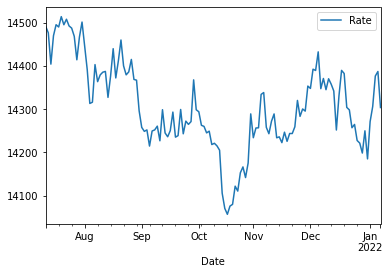

In [13]:
df.plot()

In [14]:
df2 = df.copy()
df2 = df2.reset_index()
df2['month'] = df2['Date'].dt.to_period('M')
df2

,Date,Rate,month
0,2021-07-12,14491.59294,2021-07
1,2021-07-13,14476.52203,2021-07
2,2021-07-14,14404.17703,2021-07
3,2021-07-15,14469.95831,2021-07
4,2021-07-16,14495.41215,2021-07
...,...,...,...
125,2022-01-03,14271.10676,2022-01
126,2022-01-04,14306.22137,2022-01
127,2022-01-05,14376.59427,2022-01
128,2022-01-06,14387.13904,2022-01


(13500.0, 14600.0)

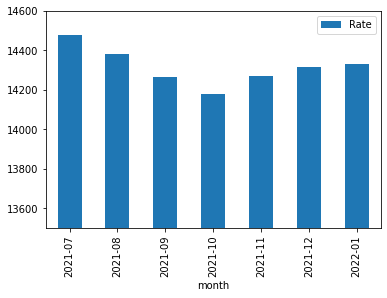

In [15]:
import matplotlib.pyplot as plt
ax2 = df2[['month','Rate']].groupby(by = 'month').mean().plot(kind="bar")
plt.ylim((13500,14600))

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`